In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.2.0


In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [4]:
_URL = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'

PATH = tf.keras.utils.get_file('/bbc-text.csv', origin=_URL, extract=False)



5062656/5057493 [==============================] - 0s 0us/step


In [5]:
PATH

'/bbc-text.csv'

In [6]:
articles = []
labels = []

with open(PATH, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [7]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [8]:
?Tokenizer

Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means we want <OOV> to be used for words that are not in the word_index

Lets us define an Out Of Vocab token - this will replace any unknown words with a token of our choosing. This is better than just throwing away unknown words since it tells our model there was information here.

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

After tokenization, the next step is to turn those tokens into lists of sequence. The following is the 11th article in the training data that has been turned into sequences.

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[2432, 1, 225, 4996, 22, 641, 586, 225, 4996, 1, 1, 1663, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1144, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3796, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3666, 682, 3533, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 542, 492, 1, 1443, 4741, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1342, 374, 20, 63, 883, 1096, 4303, 247]


In [11]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print("train_sequences[0]",len(train_sequences[0]))
print("train_padded[0]",len(train_padded[0]))

print("train_sequences[1]",len(train_sequences[1]))
print("train_padded[1]",len(train_padded[1]))

print("train_sequences[10]",len(train_sequences[10]))
print("train_padded[10]",len(train_padded[10]))

train_sequences[0] 426
train_padded[0] 200
train_sequences[1] 192
train_padded[1] 200
train_sequences[10] 186
train_padded[10] 200


In [12]:
print(train_padded[10])

[2432    1  225 4996   22  641  586  225 4996    1    1 1663    1    1
 2432   22  564    1    1  140  278    1  140  278  796  823  662 2308
    1 1144 1694    1 1721 4997    1    1    1    1    1 4738    1    1
  122 4515    1    2 2874 1506  352 4739    1   52  341    1  352 2172
 3962   41   22 3796    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4302  138   10    1
 3666  682 3533    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  599    1 1694 1021    1 4998  808 1865  117    1    1
    1 2974   22    1   99  278    1 1607 4999  542  492    1 1443 4741
  778 1320    1 1862   10   33  641  319    1   62  478  564  301 1507
   22  479    1    1 1666    1  797    1 3067    1 1364    6    1 2432
  564   22 2971 4735    1    1    1    1    1  850   39 1826  675  297
   26  979    1  882   22  361   22   13  301 1507 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. Because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so

In [15]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [17]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(set(labels))

{'business', 'tech', 'politics', 'sport', 'entertainment'}


In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 50
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/50
56/56 - 2s - loss: 1.5792 - accuracy: 0.3006 - val_loss: 1.2540 - val_accuracy: 0.4562
Epoch 2/50
56/56 - 1s - loss: 0.8417 - accuracy: 0.7045 - val_loss: 0.6082 - val_accuracy: 0.8202
Epoch 3/50
56/56 - 1s - loss: 0.3122 - accuracy: 0.9056 - val_loss: 0.3741 - val_accuracy: 0.8854
Epoch 4/50
56/56 - 1s - loss: 0.1213 - accuracy: 0.9691 - val_loss: 0.3265 - val_accuracy: 0.9124
Epoch 5/50
56/56 - 1s - loss: 0.0699 - accuracy: 0.9837 - val_loss: 0.4001 - val_accuracy: 0.8831
Epoch 6/50
56/56 - 1s - loss: 0.0829 - accuracy: 0.9775 - val_loss: 0.4247 - val_accuracy: 0.8404
Epoch 7/50
56/56 - 1s - loss: 0.1118 - accuracy: 0.9478 - val_loss: 0.3127 - val_accuracy: 0.9056
Epoch 8/50
56/56 - 1s - loss: 0.0229 - accuracy: 0.9966 - val_loss: 0.2888 - val_accuracy: 0.9303
Epoch 9/50
56/56 - 1s - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.3102 - val_accuracy: 0.9303
Epoch 10/50
56/56 - 1s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9303
Epoch 11/50
56/56 -

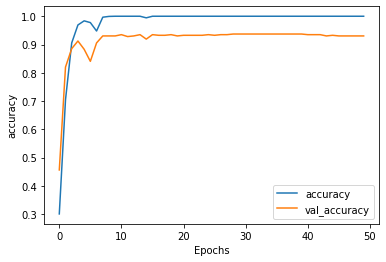

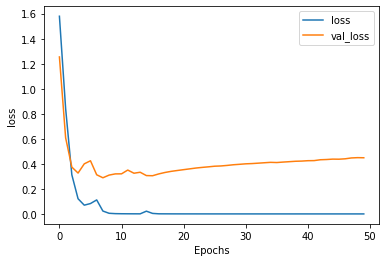

In [20]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
yhat = model.predict(validation_padded)

In [23]:
ypred = model.predict_classes(validation_padded)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
ypred

array([5, 4, 3, 1, 1, 4, 2, 4, 5, 5, 3, 3, 2, 5, 1, 5, 5, 2, 1, 3, 4, 2,
       1, 5, 4, 3, 3, 1, 1, 1, 2, 2, 2, 2, 5, 2, 3, 3, 4, 4, 5, 1, 5, 2,
       3, 1, 1, 4, 4, 2, 4, 1, 2, 2, 3, 1, 1, 3, 4, 5, 5, 5, 2, 3, 3, 2,
       4, 3, 3, 3, 3, 3, 5, 5, 4, 3, 1, 5, 1, 4, 1, 1, 1, 5, 4, 5, 4, 1,
       4, 1, 1, 5, 5, 2, 5, 5, 3, 2, 1, 4, 4, 1, 2, 1, 2, 5, 1, 3, 5, 1,
       1, 2, 3, 4, 4, 2, 2, 1, 3, 5, 1, 1, 3, 5, 4, 2, 5, 4, 3, 1, 3, 4,
       5, 1, 3, 2, 5, 3, 5, 3, 1, 3, 2, 2, 3, 2, 4, 1, 2, 5, 2, 1, 1, 4,
       4, 3, 4, 3, 3, 1, 1, 1, 2, 4, 5, 2, 1, 2, 1, 2, 4, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 5, 2, 2, 2, 1, 3, 1, 4, 2, 1, 1, 1, 2, 5, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 1, 1, 3, 3, 3, 1, 1, 3, 3, 4, 2, 1, 1, 1, 1, 4, 1,
       2, 2, 2, 2, 1, 3, 1, 4, 4, 1, 4, 2, 5, 2, 1, 2, 4, 4, 3, 5, 2, 5,
       2, 4, 3, 5, 4, 5, 5, 4, 4, 4, 4, 2, 1, 1, 5, 2, 3, 5, 2, 4, 1, 4,
       3, 1, 3, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 4, 3, 1, 1, 3, 1, 5, 4,
       4, 2, 4, 1, 2, 2, 4, 1, 4, 4, 4, 1, 5, 1, 3,

In [29]:
validation_label_seq=validation_label_seq.flatten()

In [28]:
ypred.shape

(445,)

In [31]:
validation_label_seq.shape

(445,)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_label_seq, ypred)

array([[98,  1,  2,  0,  0],
       [ 2, 97,  1,  6,  0],
       [ 4,  0, 76,  4,  2],
       [ 1,  2,  0, 82,  1],
       [ 0,  0,  1,  4, 61]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(validation_label_seq, ypred))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       101
           2       0.97      0.92      0.94       106
           3       0.95      0.88      0.92        86
           4       0.85      0.95      0.90        86
           5       0.95      0.92      0.94        66

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445

